# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Caravel GF180 MPW User Environment

<b>Lecture Date:</b> 12/4/2023

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

## Overview

You will develop a Verilog circuit to synthesize on the EFabless Caravel OpenLane flow using the Global Foundries gf180mcuD Process Development Kit.

For example, I implemented the full 8-bit RISC Processor in Verilog, and my solution is open and available at the following links:
<ol>
    <li><b>EFabless</b> - <a href = "https://repositories.efabless.com/mattmorrison/nd-mips8-efabless">https://repositories.efabless.com/mattmorrison/nd-mips8-efabless</a></li>
    <ul><li>Note: You will need to create an account to view on EFabless. You will do this in this Final Project<p></li></ul>
    <li><b>GitHub</b> - <a href = "https://github.com/mmorri22/nd-mips8-efabless">https://github.com/mmorri22/nd-mips8-efabless</a></li>
</ol>

# Section 1 - Developing Your Verilog Project to Synthesize

You will develop a Verilog circuit that you will synthesize in the EFabless GF180 Caravel Flow.


### Rules

<ol>
    <li><b>Your design may not have more than 16 input bits and 16 output bits, as well as a clk and reset signal</b>. The reason is that the EFabless Caravel Harness has a total of 32 General Purpose Input/Output (GPIO) pins, so your design will not synthesize if you try to implement more than 32 bits of I/O signals. There are also two pins available for <code>clk</code> and <code>reset</code> signals</li>
    <li>Must implement a form of design logic, controller, and finite state machine with at least five states. Some hints:</li>
    <ul>
        <li>The datapath should calculate the operation based on the control signals from the controller</li>
        <li>The controller should take some sort of input to drive the Finite State Machine, which then produces the outputs of the control signal</li>
        <li>While you can't do a MIPS processor, you are welcome to review my solution for the MIPS datapath, controller, and state machine at <a href = "https://github.com/mmorri22/nd-mips8-efabless/blob/main/verilog/rtl/user_proj_example.v">user_proj_example.v</a> as a guide. (Everything after the <code>module user_proj_example</code>, which I will explain later.</li>
        <li>The circuit I designed is likely much more complex than the circuit you will develop.</li>
    </ul>
    <li><b>Your project must be open source</b> - Meaning no Intellectual Property. Not anyone else's IP, and certaintly not your own. Since these projects will be published pubicly, you will want to protect any business ideas you have (that is another flow with a different set of associated costs)</li>
    <li>You must develop a testbench - similar to those we developed in class - to test your circuit and run it in <code>irun</code></li>
    <li>You will need to be able to describe your circuit and test in detail at the final presentation. You will not be required to write a report, but anything you can develop to make your presentation smoother will help</li:L.
</ol>

# Section 2 - Integrating your Verilog Project into EFabless Caravel

## Part 1 - Getting Started

> <b>Note 1</b>: This example assumes completion of the <a href = "https://github.com/mmorri22/cse30342/blob/main/Resources/Final%20Project%20-%20Setup.ipynb">EFabless Setup</a>.

> <b>Note 2</b>: Several of the steps do not work if you are connected to a Virtual Private Network. You will not need a VPN to complete this assignment.

<b>1) Open your VS Code or Terminal</b>

Enter into yourLinux Distro.

If you are on Windows, type <code>wsl</code>

  
<b>2) Set up Environment Variables</b>

Recall the <code>exports.sh</code> file that you created. You will <code>source</code> that file, just like we've been doing with Cadence all semester

    source exports.sh
    
To verify, perform the following commands:

    > echo $OPENLANE_ROOT
    /mnt/c/Users/mmorri22/asic/openlane
     
    > echo $PDK_ROOT
    /mnt/c/Users/mmorri22/asic/pdk
    
    > ls $OPENLANE_ROOT
    AUTHORS.md       Jenkinsfile  Makefile   configuration  designs  docs    flow.tcl  klayoutrc           requirements.txt      requirements_lint.txt  scripts
    CONTRIBUTING.md  LICENSE      README.md  dependencies   docker   env.py  gui.py    regression_results  requirements_dev.txt  run_designs.py         tests
      
    > ls $PDK_ROOT
    gf180mcuA  gf180mcuB  gf180mcuC  gf180mcuD  volare


<b>3) Go into your Caravel User Project</b>

    cd caravel_user_project/


<b>4) Running KLayout and Changing Editing Permissions</b>

Check the gds file:

    ls gds/
    
This is what you should be able to view:

    user_proj_example.gds  user_project_wrapper.gds

To verify it works, perform the following command:

    klayout -l ../asic/pdk/gf180mcuD/libs.tech/klayout/tech/gf180mcu.lyp gds/user_proj_example.gds & 
    
We will enable the ability to edit the circuit by performing the following tasks in KLayout.
<ol>
    <li>Go to <b>File -> Setup</b></li>
    <li>Under <b>Application</b>, select <b>Editing Mode</b></li>
    <li>Select <b>Use Editing Mode By Default</b></li>
    <li>Select <b>Apply</b> and then <b>OK</b></li>
</ol>

<b>5) Changing the Layers View</b>

At first glance, this appears like a giant yellow box. This is because the Caravel "Harness" is designed to take on larger projects than the sample synthesis flow provided. As a result, most of the chip is empty. 

If you look carefully at the bottom, you'll see that the circuit appears to have more wiring and cells in use.

But how can we view this more clearly? Let's play around with layers.

Select <b>View -> Layers</b>

You will see the layers that correspond to all the different layers we have learned about this semester.

On the left, select the arrow next to <b>user_proj_example</b>. This includes all the cells in the gf180mcuC PDK.

To help us view the layout, we will de-select all the "fill" cells. Scroll down the the first one "<code>fill_1</code>" and start doubling clicking until all the fills are crossed out. The circuit will now be much more visible. An example "Before and After" is shown below:

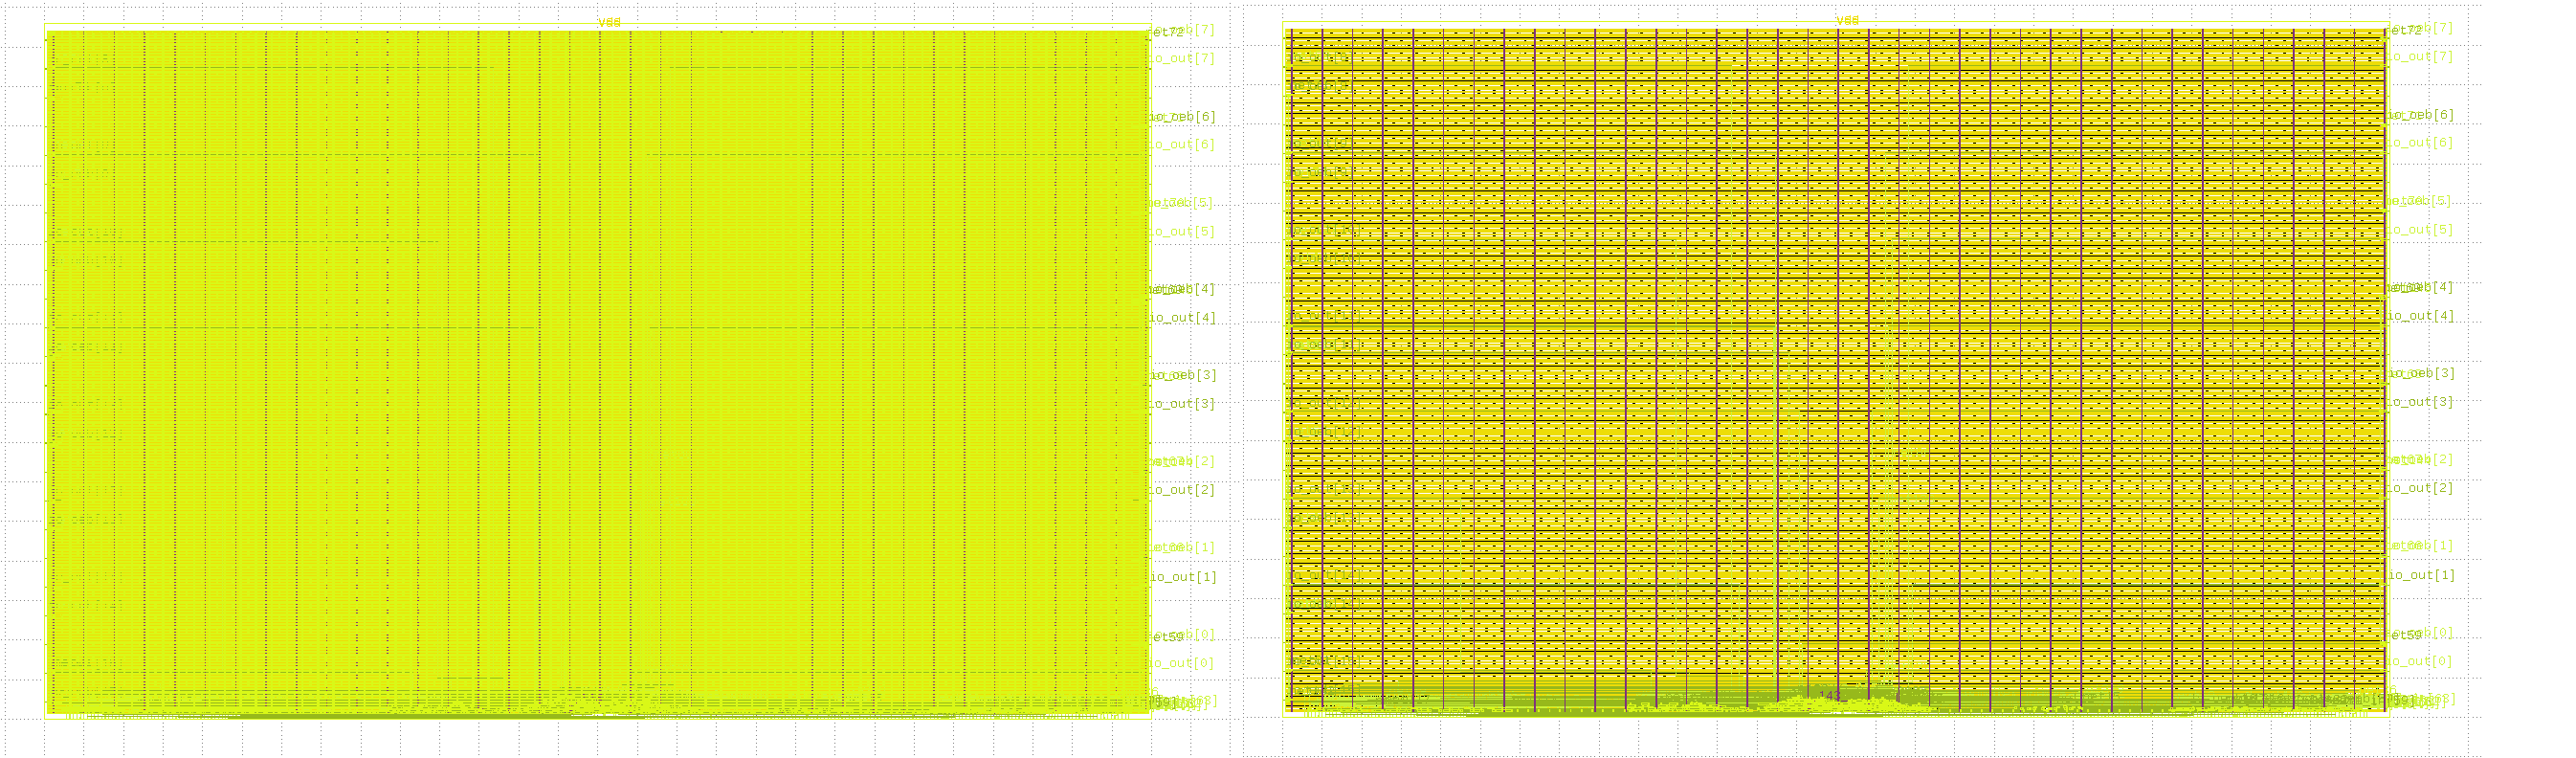

### Delete the GDSII Files

These gds files are for the example project provided by EFabless. Part of their Multi-Project Wafer (MPW) Check is that is performed before you can get your chip is that they will check if you developed your own unique project by comparing their gds files with yours. To simplify this process, let's delete the files: 

    cd gds
    rm *
    cd ..

## Part 2 - Connecting your Verilog with the Caravel Harness

In this step, we will go through the process of connecting your Verilog design with the Caravel Harness. 

> The <a href = "https://caravel-harness.readthedocs.io/en/latest/">EFabless Caravel Harness</a> comprises of base functions supporting IO, power and configuration as well as drop-in modules for a management SoC core, and an approximately 3000um x 3600um open project area for the placement of user IP blocks.

Your design will eventually end up in the <code>user_project_wrapper</code>, which connects to the outside world using the General Purpose Input/Output (GPIO) Pad Frames.

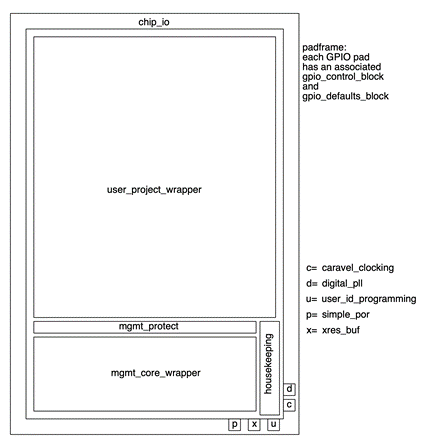

## Part 3 Integrating Your Verilog File with user_proj_example.v

> <b>Note:</b> The YouTube video below is where I replicate Steps 1-X in this section. I recommend taking them slowly, watching along with the YouTube video. Click on the image in order to see the video.

[![user_proj_example.v](https://img.youtube.com/vi/VRs-eF5ui1I/0.jpg)](https://www.youtube.com/watch?v=VRs-eF5ui1I)

<b>Step 1 - Opening the user_proj_example.v file</b>

Go into the Verilog directory

    > cd verilog
    > ls

You will see the following folders:

    dv  gl  includes  rtl
    
The Verilog we will write will be in the rtl folder. Go into that folder

    > cd rtl
    > ls
    
You will see the Verilog for the <code>usr_proj_example</code> that you synthesized in the setup.

    defines.v  uprj_netlists.v  user_defines.v  user_proj_example.v  user_project_wrapper.v
    
Open your <b>user_proj_example.v</b> file. It will initially appear exactly as it was in the cloned Caravel repo:
<ul><li><a href = "https://github.com/efabless/caravel_user_project/blob/main/verilog/rtl/user_proj_example.v">https://github.com/efabless/caravel_user_project/blob/main/verilog/rtl/user_proj_example.v</a></li></ul>


You will see several signals in the <code>module user_proj_example</code> code. For simplicity, we have limited our design scope to the clk, rst, and 16 GPIO pins.
<ol>
    <li>Go past the inputs to the <code>module user_proj_example</code> for now and go to the internals of the module. After <code>wire rst</code>, delete everything <i>except</i> <code>endmodule</code> in the user_proj_example.</li>
    <li>Delete the existing <code>counter</code> verilog module. Delete everything <i>except</i> <code>`default_nettype wire</code></li>
    <li>Copy your Verilog in-between the <code>endmodule</code> and the <code>`default_nettype wire</code></li>
    <li>Go back to the inputs of the <code>module user_proj_example</code>. Delete everything between (including) <code>input wbs_stb_i,</code> and <code>input  [63:0] la_oenb,</code>. Also, delete the IRQ signal <code>output [2:0] irq</code>.</li>
    <li>Change the number of bits for <code>io_in</code> to the number of <b>input</b> bits. For example, if you have 8 bits of inputs, change it to <code>input  [7:0] io_in</code>.</li>
    <li>Change the number of bits for <code>io_out</code> to the number of <b>output</b> bits. For example, if you have 8 bits of outputs, change it to <code>output  [7:0] io_out</code>.</li>
    <li>Change the number of bits for <code>io_oeb</code> to the number of <b>output</b> bits. For example, if you have 8 bits of outputs, change it to <code>output  [7:0] io_oeb</code>.</li>
    <ul><li>The OEB signals perform control such that data can be read from the memory device</li></ul>
    <li>You will very likely have a clk signal. In the internal of the module, set <code>wire clk = wb_clk_i;</code></li>
    <li>You will very likely have a rst signal. In the internal of the module, set <code>wire rst = !wb_rst_i;</code></li>
    <li>We will include a line of code <code>assign io_oeb = 1'b0;</code> which will ensure all outputs are active</li>
    <li>Create wire busses to map to the output</li>
    <ul><li>You will note in my video that I am rather deliberate about calculating the results (even though I have a tested and proven answer) because this is the only way to ensure you do not have several headaches </li></ul>
    <li>Map the input and output signals and wires to an instance of your Verilog design</li>
    <li><code>assign</code> the wires corresponding to the outputs of the <code>module user_proj_example</code>
</ol>

When you are done, you will go back to the terminal. Go to the 

    cd openlane/user_proj_example

Open the file <code>config.json</code> and verify the entry: <code>"DIE_AREA": "0 0 2800 1760"</code>

Go back to the main folder:

    cd ../..

Perform the following command:

    make user_proj_example
    
Upon completion, you will run 44 successful steps. In my design, Steps 39 and 42 take awhile, so do not worry if a step appears to "hang".

Upon completion, you can check to make sure that the gds file has been created. Go to the terminal and run the following command, which will show the corresponding result.

    > ls gds
    user_proj_example.gds

To view the gds file, perform the same command as before. Notice the difference in the circuits:

    klayout -l ../asic/pdk/gf180mcuD/libs.tech/klayout/tech/gf180mcu.lyp gds/user_proj_example.gds & 

## Part 4 - Updating <code>user_project_wrapper</code> to account for our project

The next part of the design process is to map the <code>user_proj_example</code> to the <code>user_project_wrapper</code>.

Keep your <code>user_proj_example.v</code> file open so you can compare and contrast the files.

> <b>Note:</b> The YouTube video below is where I replicate Steps 1-X in this section. I recommend taking them slowly, watching along with the YouTube video. Click on the image in order to see the video.

[![user_project_wrapper.v](https://img.youtube.com/vi/pcmdvZ5x8LM/0.jpg)](https://www.youtube.com/watch?v=pcmdvZ5x8LM)

<b>Step 1</b> - we will go to the <code>user_project_wrapper.v</code> in the same folder.

<ol>
    <li>Go to the bottom where the <code>user_proj_example mprj</code> is instantiated.</li>
    <li>Just as before, delete everything between (including) <code>input wbs_stb_i,</code> and <code>input  [63:0] la_oenb,</code>. Also, delete the IRQ signal <code>output [2:0] irq</code></li>
    <li>For the number of input bits, make the lower value 5 and go up to the top value</li>
    <ul><li>For example, in my circuit, we have 8 input bits, so we will use <code>.io_in({io_in[12:5]}),</code>. The reason why we will start at 5 will become clear when we change the <code>user_defines.v</code> file.</li></ul>
    <li>Counting up from that top number in the previousstep, set the number of output bits to <code>io_out</code></li>
    <ul><li>For example, the top number for <code>io_in</code> in the previous step was 12, so starting at 13, count up the number of output bits (in my case, 16, so I did <code>.io_out({io_out[28:13]}),</code></li></ul>
    <li>For the io_oeb, set it equal to the exact same values as the io_out. For my example, that would be <code>.io_oeb({io_out[28:13]})</code></li>
</ol>

Save and close the <code>user_project_wrapper.v</code> file.

<b>Step 2 - Modify the <code>user_defines.v</code> file.</b>

Starting at <code>USER_CONFIG_GPIO_5_INIT</code> up through the end of the input signals (in my exaple, <code>USER_CONFIG_GPIO_12_INIT</code>), change the values from <code>GPIO_MODE_INVALID</code> to <code>GPIO_MODE_MGMT_STD_BIDIRECTIONAL</code>. 

Then, change <i>all the remaining pins</i> - all the way to <code>USER_CONFIG_GPIO_37_INIT</code> to <code>GPIO_MODE_USER_STD_OUTPUT</code>

> This step is crucial. If you do not change all of them, then you will not be able to pass MPW in the final steps.

<b>Step 3 - Modify the <code>macro.cfg</code> file.</b>
    
Open the <code>openlane/user_project_wrapper/macros.cfg</code> file, and change the file to the following:

    mprj 15 15 N
    
Reducing the number from 60 to 15 will ensure that the synthesis moves closer to the input/output pins.

<b>Step 4 - Compile the user_project_wrapper</b>

Go to the top folder and perform the following command:

    make user_project_wrapper
    
Upon completion, you can check to make sure that the gds file has been created. Go to the terminal and run the following command, which will show the corresponding result. <b>You need a valid user_project_wrapper.gds to get a chip</b>.

    > ls gds
    user_proj_example.gds user_project_wrapper.gds

To view the gds file, perform the same command as before. Notice the difference in the circuits:

    klayout -l ../asic/pdk/gf180mcuD/libs.tech/klayout/tech/gf180mcu.lyp gds/user_project_wrapper.gds & 
    
    
<b>Step 5 - Modify your README.md file</b>

It is required that you modify the README.md file in the caravel_user_project folder in order to submit. Here is what you should put in your README.md:

1) The name of your project

2) The name of each member of the group

3) The email of each member of the group

4) Put "CSE 30342 - Digital Integrated Circuits - University of Notre Dame"

5) A detailed description of your Verilog project.

## Part 5 - Creating an EFabless Account and Repository

Now that you have successfully created the <code>user_project_wrapper.gds</code> and <code>user_proj_example.gds</code> files, we will create an EFabless account and repository. Then, I will show you how to push your code to the EFabless Repository.

All members of the group should complete this step, so you are all affiliated with the chip fabrication.

<ol>
    <li>Go to the GF180 MPW page: <a href ="https://efabless.com/gf-180-open-mpw-shuttle-program">https://efabless.com/gf-180-open-mpw-shuttle-program</a></li>
    <li>In the upper right, select Login or Sign Up</li>
    <li>To sign in with your Notre Dame NetID, select "Sign in with Google"</li>
    <li>After you sign up, select the link "You do not yet have a profile. Please click here to create one."</li>
    <ul><li>If you are not comfortable putting your phone number - which is required - you can put my office number: 574-631-9318</li></ul>
    <li>Put all of your skills (which is required). This is good practice to see what you can actually put on your resume now! Do the same for "Areas of Expertise" You'll be surprised how much you actually know now.</li>
</ol>

## Part 6 - Creating an SSH Key

You will need to create a local SSH key, and then add it to your EFabless profile. Only the group member pushing the final design needs to perform this step.

> Note: If you already have an ssh key, you can just perform the command <code>cat ~/.ssh/id_rsa.pub</code>, copy the result, and then go the part of the directions where you enter the Key into EFabless.

Perform the following commands:

    cd ~/.ssh
    ssh-keygen -o -t rsa -C youremail@nd.edu
    
Press Enter so you don't require a password

Next, perform the following command:

    cat id_rsa.pub
    
Then copy the entire contents of the output.

Now go to <a href = "https://repositories.efabless.com/">https://repositories.efabless.com/</a>

On the top right, select the down arrow next to the icon for your account. Select "My Settings"

On the left, select <b>SSH Keys</b>. Then, on the right, select <b>Add SSH Key</b>. Paste your SSH Key into the 

## Part 7 Creating a Project on the GF180 MPW Shuttle

Now that everyone in your group has created an account, you will need to create a new Project. One member should take the lead, and will add all the other group members.

1) Go to <a href = "https://platform.efabless.com/">https://platform.efabless.com/</a>

2) Scroll to the bottom where it says "Active Shuttles" and be sure you are on the "GFMPW-1"

3) Select "Start Project"

4) Enter the name and information you would like to enter for your project.

<li>For the Avatar, you are welcome to use the image below, which will identify you as a student in my class. Just right click and download, and then upload on your account.</li>
</ol>

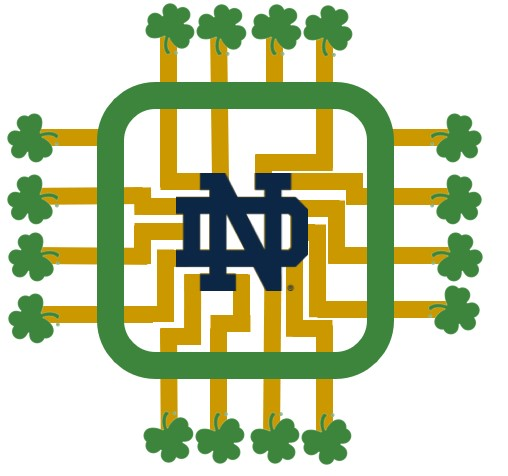

5) Press "Save"

6) On the next page, the "Overview" will already be selected. Make a copy of the last two commands. For example, I made a back up with these two commands. Yours will be quite similar, but be clear that you must copy your own versions.

    git remote add ef-repo ssh://git@repositories.efabless.com/mattmorrison/BB.git
    git push -u ef-repo main

7) From your caravel_user_project folder, run the following commands:

    git add --all
    git commit -m "Push for MPW and Tapeout Check"

Then, add <i>your version</i> of the <code>git remote add</code> command.

    git remote add ef-repo ssh://git@repositories.efabless.com/mattmorrison/BB.git
    
Now, you can push your project to the 

    git push -u ef-repo main
    
8) Once you have successfully pushed, go to <a href = "https://repositories.efabless.com/dashboard/projects">https://repositories.efabless.com/dashboard/projects</a> and select your project.

Click on Settings 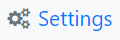

On the left, select <b>Users and Groups</b>. Add the usernames of all the other group members, as well as <code>mattmorrison</code> (this is to correlate all the chips with Notre Dame).

9) At the top of the page, select Shuttles and then GFMPW-1

10) Next to <b>MPW Precheck</b>, select <b>Submit</b>. For the job, enter some key to differentiate (you may need to do this multiple times.) This process takes about 20 minutes.

11) Once you pass, next to <b>Tapeout</b>, select <b>Submit</b>. On the pop up, select the most recently successful Precheck from the Pulldown. Add a unique name.

12) Once the Tapeout is successful, complete the address form. Put in the following address information (feel free to ignor warning messages).

    384 Fitzpatrick Hall (c/o Prof. Morrison)
    Department of Computer Science and Engineering
    South Bend IN US 46656

We are coordinating the sending of chips here so we can review them upon fabrication.

13) Complete the Legal category (both the Terms and Conditions, as well as Export Compilance). This is essentially verifying that nothing you are submitting is Intellectual property, so there is no issue with it being in the public domain.

14) Press Submit next to "Submission", and you have completed the Project!